In [1]:
# Imports and setup
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "#f8f8f8",
    "axes.grid": True,
    "grid.alpha": 0.3,
    "font.size": 12,
    "axes.spines.top": False,
    "axes.spines.right": False,
})


# Ground truth and model setup
# True population: Y = 2 + 3X + noise
# Model f is decent but biased: f(x) = 2.5 + 2.8x (systematic overestimate)

theta_star = 2  # E[Y] = 2 since E[X]=0

def true_dgp(n):
    """Sample (X, Y) pairs from the population."""
    X = np.random.randn(n)
    Y = 2 + 3 * X + np.random.randn(n)  # E[Y] = 2, Var(Y) = 9 + 1 = 10
    return X, Y

def model_f(X):
    """A biased but correlated predictor."""
    return 2.5 + 2.8 * X  # bias = E[f(X) - Y] = 0.5

# %% Run simulation
n_labeled = 50       # small labeled set
N_unlabeled = 2000   # large unlabeled set
n_trials = 5000

estimates = {"Classical": [], "Naive model": [], "PPI": []}

for _ in range(n_trials):
    # Labeled data (gold standard)
    X_lab, Y_lab = true_dgp(n_labeled)

    # Unlabeled data (only X observed)
    X_unlab = np.random.randn(N_unlabeled)

    # Classical: just use labeled Y
    theta_c = Y_lab.mean()

    # Naive: trust the model on the big unlabeled set
    theta_naive = model_f(X_unlab).mean()

    # PPI: model on unlabeled - bias correction from labeled
    theta_pp = model_f(X_unlab).mean() - (model_f(X_lab) - Y_lab).mean()

    estimates["Classical"].append(theta_c)
    estimates["Naive model"].append(theta_naive)
    estimates["PPI"].append(theta_pp)


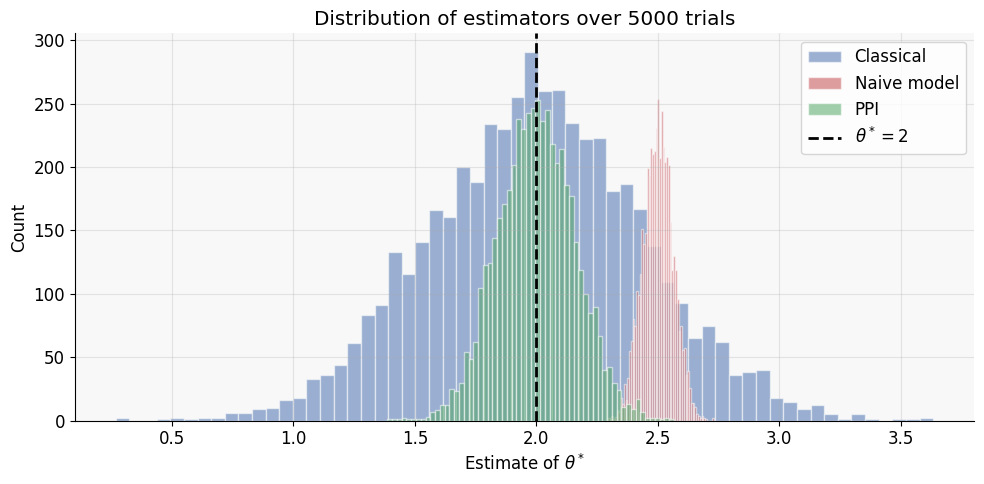

In [2]:

# Plot Histogram of estimates
fig, ax = plt.subplots(figsize=(10, 5))

colors = {"Classical": "#4C72B0", "Naive model": "#C44E52", "PPI": "#55A868"}

for name, vals in estimates.items():
    ax.hist(vals, bins=60, alpha=0.55, label=name, color=colors[name], edgecolor="white")

ax.axvline(theta_star, color="black", ls="--", lw=2, label=f"$\\theta^* = {theta_star}$")
ax.set_xlabel("Estimate of $\\theta^*$")
ax.set_ylabel("Count")
ax.set_title("Distribution of estimators over 5000 trials")
ax.legend(frameon=True, facecolor="white")
plt.tight_layout()
plt.savefig("ppi_histograms.png", dpi=150)
plt.show()


/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_14468/2922458899.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, fontsize=11)
/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_14468/2922458899.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, fontsize=11)


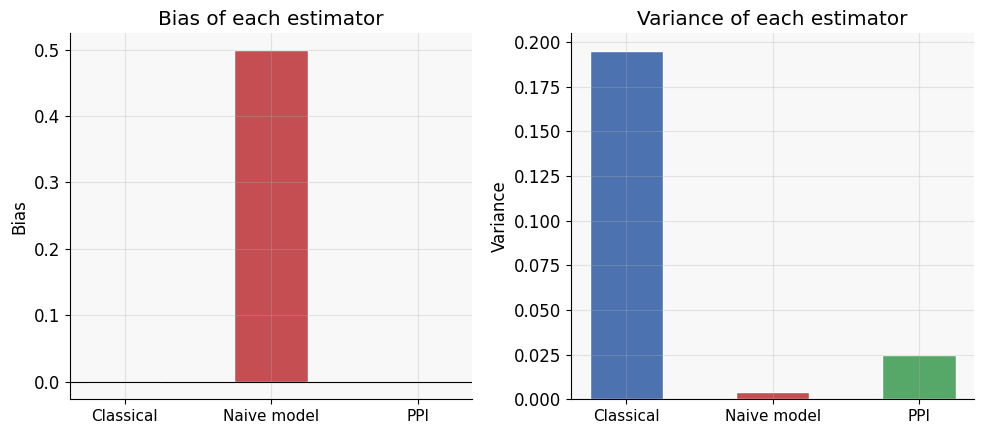

Estimator           Mean     Bias      Var
------------------------------------------
Classical         1.9985  -0.0015   0.1950
Naive model       2.4995   0.4995   0.0039
PPI               1.9996  -0.0004   0.0248

Variance ratio (PPI / Classical): 0.1273


In [3]:

# Plot Bias and variance summary
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

names = list(estimates.keys())
means = [np.mean(estimates[n]) for n in names]
variances = [np.var(estimates[n]) for n in names]
biases = [np.mean(estimates[n]) - theta_star for n in names]
bar_colors = [colors[n] for n in names]

# Bias plot
axes[0].bar(names, biases, color=bar_colors, edgecolor="white", width=0.5)
axes[0].axhline(0, color="black", lw=0.8)
axes[0].set_ylabel("Bias")
axes[0].set_title("Bias of each estimator")

# Variance plot
axes[1].bar(names, variances, color=bar_colors, edgecolor="white", width=0.5)
axes[1].set_ylabel("Variance")
axes[1].set_title("Variance of each estimator")

for ax in axes:
    ax.set_xticklabels(names, fontsize=11)

plt.tight_layout()
plt.savefig("ppi_bias_variance.png", dpi=150)
plt.show()

# %% Print summary
print(f"{'Estimator':<15} {'Mean':>8} {'Bias':>8} {'Var':>8}")
print("-" * 42)
for name in names:
    vals = estimates[name]
    print(f"{name:<15} {np.mean(vals):>8.4f} {np.mean(vals)-theta_star:>8.4f} {np.var(vals):>8.4f}")
print(f"\nVariance ratio (PPI / Classical): {np.var(estimates['PPI']) / np.var(estimates['Classical']):.4f}")